# BigQuery 공개 데이터 세트 탐색


## Google cloud flatform 로그인
---

- 인터넷 검색 창에 Google cloud flatform으로 검색하고 접속한다.
- 페이지 로그한 뒤 구글 계정으로 로그인 하기.
- 권한에 대한 동의하기(하지 않으면 사용에 제한됨)

**빅쿼리 실행**
- 왼쪽 제일 위쪽에 메뉴를 클릭해서 BigQuery를 찾아서 클릭하자.
 - 처음 실행이라면 동의를 누른다.


## 1. 공개 데이터 세트 쿼리

- 공개 데이터 세트 USA Names를 BigQuery에 불러옴
- 데이터 세트를 쿼리를 이용하여 미국에서 가장 일반적인 이름을 확인
 - 1910년 부터 2018년 자료를 이용

**USA Names 데이터 세트 불러오기**

1. 왼쪽 창에서 데이터 **추가 > 공개 데이터세트** 탐색하기 클릭

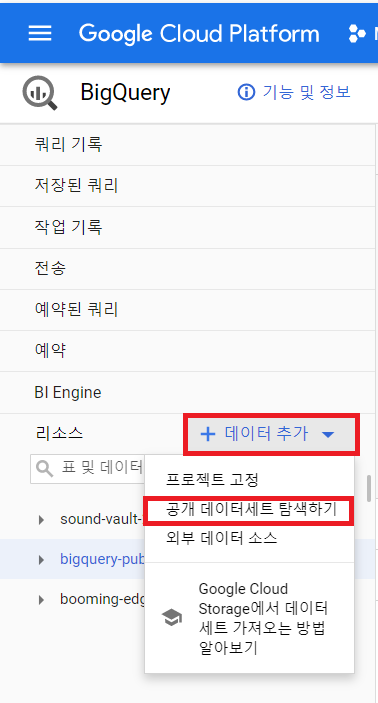

2. 검색창에 USA Names을 입력하고 검색한다.
3. 검색 결과에 USA Names을 클릭한다.

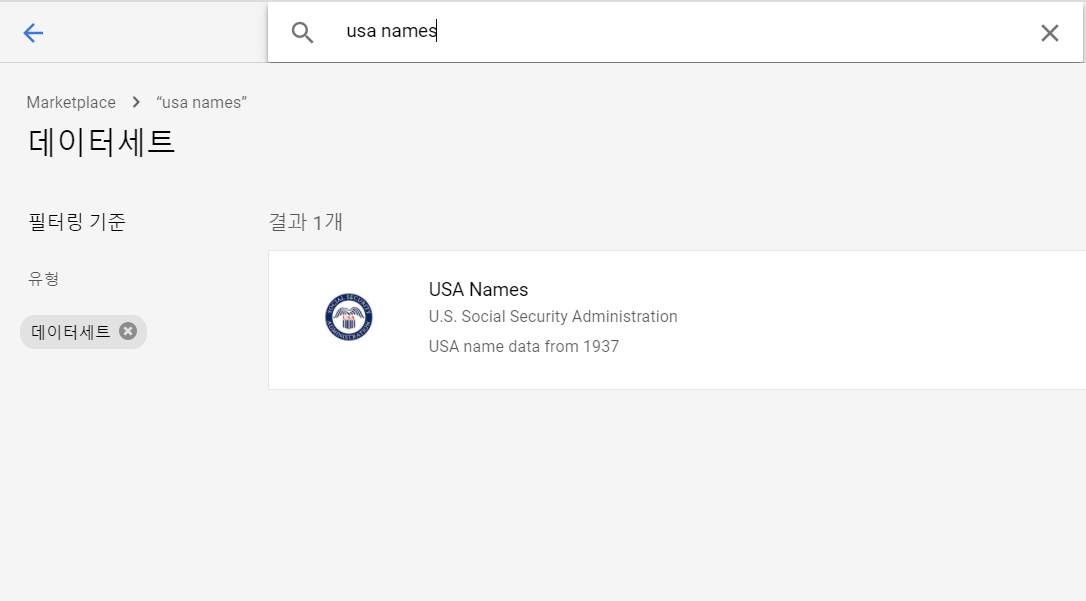

4. 데이터 세트 클릭하기<br>
데이터 받기를 클릭하면 리소스 창에 ```USA Names```라는 데이터가 추가 된다.

**USA Names 데이터 세트 쿼리**

데이터 세트에서 이름과 성별에 대한 상위 10개를 내림차순으로 나열하자.

1. 다음 쿼리를 복사해서 쿼리 편집기에 넣어보자!

In [ ]:
SELECT
  name, gender,
  SUM(number) AS total
FROM
  `bigquery-public-data.usa_names.usa_1910_2013`
GROUP BY
  name, gender
ORDER BY
  total DESC
LIMIT
  10

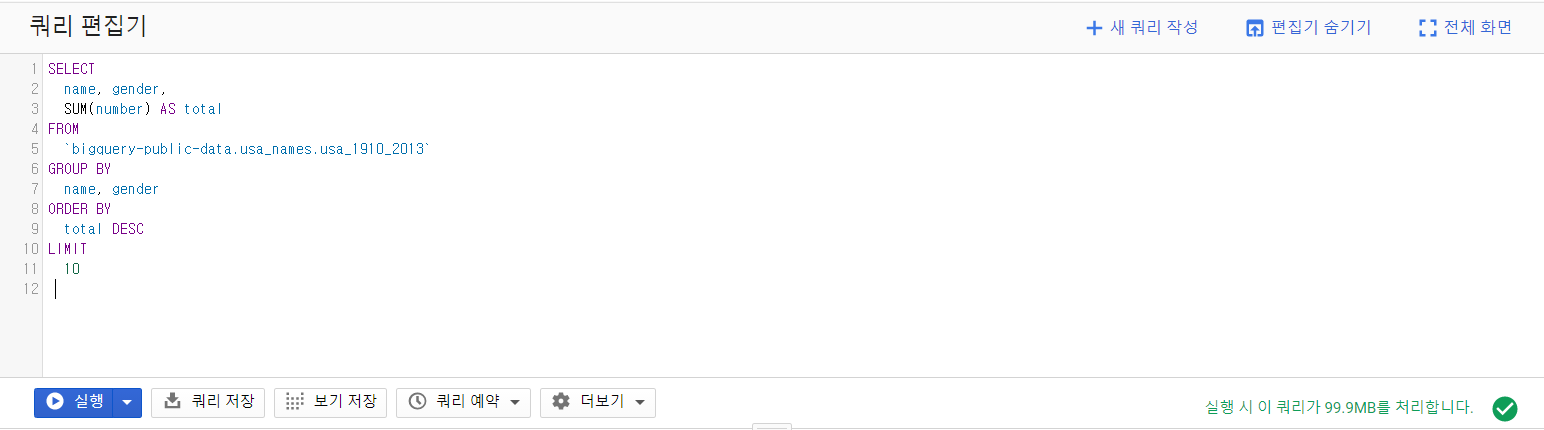

2. 쿼리 편집기 오른쪽 하단의 유효성을 확인한다.
- 쿼리가 유효한 경우 초록색으로 표시
- 유효하지 않으면 빨간색으로 표시
- 쿼리가 유효하면 쿼리를 실행할때 데이터의 양도 표시

3. 실행을 눌러보자.
- 쿼리 결과가 쿼리 편집기 아래에 열림
- 섹션 상단에 경과 기간과 처리한 데이터를 표시
- 결과 아래에 테이블이 표시됨

## 2. 사용자 정의 테이블 만들기
- 이 작업에서는 사용자 지정 테이블을 만들고 데이터를로드 한 다음 테이블에 대해 쿼리를 실행

**로컬 컴퓨터에 데이터 다운로드**
- 다운로드하는 파일에는 인기있는 아기 이름에 대한 7MB의 데이터가 포함되어 있으며 미국 사회 보장국에서 제공하는 데이터 이다.

1. 아기 이름 데이터를 다운로드 한다.

2. 압축을 푼다.

3. yob2014.txt라는 파일을 열어 데이터가 어떨게 보이는지 확인한다. 

4. 나중에 찾을 수 있도록 파일 위치를 기록하자!


## 3. 데이터 세트 만들기

이 작업에서는 테이블을 보관할 데이터 세트를 만들고 프로젝트에 데이터를 추가 한다음 쿼리 할 데이터 테이블을 만든다.

1. 왼쪽 창의 리소스 섹션에 프로젝트 ID를 클릭한다.

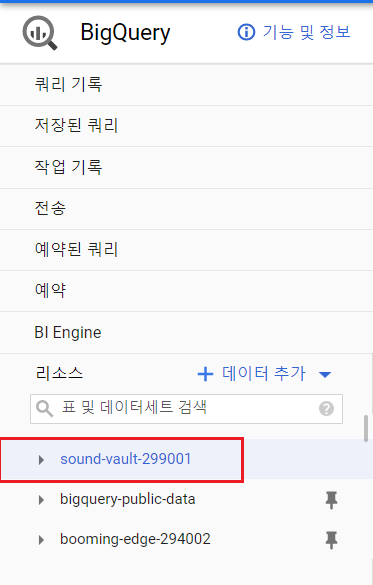

2. 프로젝트 섹션의 오른쪽에서 ```데이터세트 만들기``` 클릭

3. 데이터세트 만들기 페이지에서:
 - 데이터세트 ID에 ```babynames```를 입력
 - 데이터 위치로 미국(US)을 선택
 - 나머지 값들은 그대로 둔다.

 연습을 위해 데이터세트는 미국을 선택함

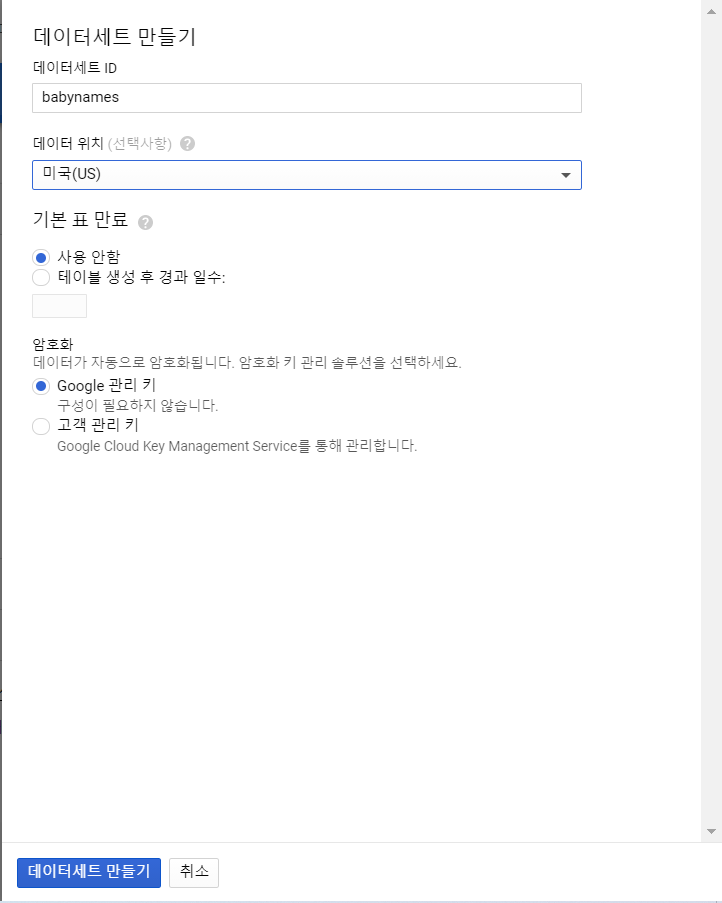

4. 하단에 데이터세트 만들기 클릭

## 4. 새 테이블에 데이터 불러오기

만들 테이블에 다운 받은 데이터 불러온다.

1. 리소스 섹션에서 ```babynames```를 클릭 한 다음 테이블 만들기를 클릭한다.
 - 테이블 만들기는 편집창 아래 존재
2. 테이블 만들기 페이지에서:
- 소스의 경우 테이블 생성 위치: 업로드
- 파일 선택에서 찾아보기를 클릭하고 yob2014.txt 파일선택
- 파일 형식은 CSV
- 테이블 이름은 names_2014를 입력
- 스키마 섹션은 텍스트로 편집으로 바꾸고 아래의 텍스트를 붙여 넣기<br>
```name:string,gender:string,count:integer```

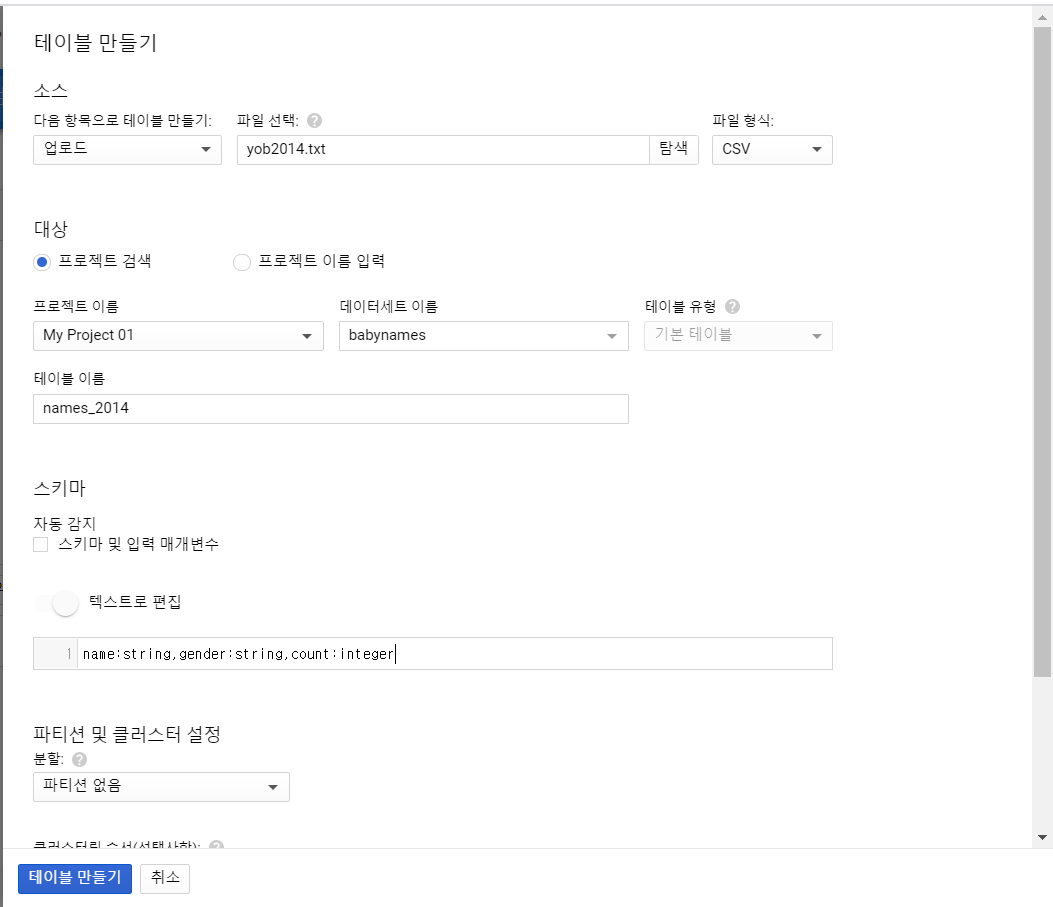

3. 테이블 만들기 클릭한다.

4. 테이블을 만들때 까지 기다린다.

**미리보기**

1. 리소스 아래에 babynames > names_2014를 선택한다.

2. 편집기 아래에 미리보기 탭을 눌러 미리보기를 한다.


## 5. 쿼리 테이블

이제 테이블에 데이터를로드 했으므로 이에 대해 쿼리를 실행할 수 있다. 이번에는 공개 테이블 대신 테이블을 쿼리한다는 점을 제외하면 프로세스는 이전 예제와 동일하다.

1. 쿼리 편기기에서 ```새 쿼리 작성```을 클릭한다.

2. 다음 쿼리를 복사하여 쿼리 편집기에 붙여 넣는다.
 - 이 쿼리는 2014년 미국 남자아이의 상위 5개 이름을 검색한다.



In [ ]:
SELECT
 name, count
FROM
 `babynames.names_2014`
WHERE
 gender = 'M'
ORDER BY count DESC LIMIT 5

3. 실행을 클릭하면 결과가 쿼리 창 아래에 표시된다.

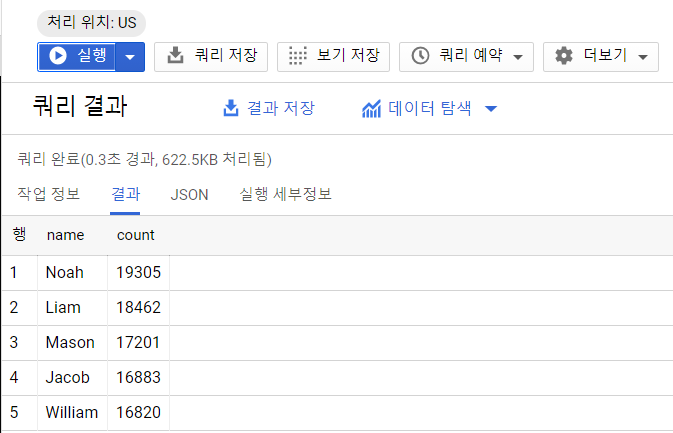